# Stroke Prediction Dataset

#### According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

#### This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

# Attribute Information
1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [1]:
#importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import random
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [4]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder , LabelEncoder

In [5]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

In [6]:
import sklearn.metrics as metrics

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [8]:
from imblearn.over_sampling import SMOTE 

In [9]:
#Reading the dataset

In [10]:
df=pd.read_csv('D:\\M. Tech in Data Science & Machine Learning\\Machine Learning 2\\Sem_preparation\\healthcare-dataset-stroke-data\\healthcare-dataset-stroke-data.csv')
df.head()#first 5 records

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [11]:
df.tail()#last 5 records

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [12]:
df.shape#5110 records and 12 columns

(5110, 12)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [14]:
df_num=df.select_dtypes(include=np.number)
len(df_num.columns)#number of numerial columns

7

In [15]:
df_num.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')

In [16]:
df_cat=df.select_dtypes(include='object')
len(df_cat.columns)#number of categorical columns

5

In [17]:
df_cat.columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [18]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [19]:
#inferences:

#for the age column maximum age is 82 and average age is 43

In [20]:
for i in df_cat.columns:
    print('% observations in each category for the column', i,':')
    print(df_cat[i].value_counts()*100/len(df_cat))
    print()

% observations in each category for the column gender :
Female    58.590998
Male      41.389432
Other      0.019569
Name: gender, dtype: float64

% observations in each category for the column ever_married :
Yes    65.616438
No     34.383562
Name: ever_married, dtype: float64

% observations in each category for the column work_type :
Private          57.240705
Self-employed    16.027397
children         13.444227
Govt_job         12.857143
Never_worked      0.430528
Name: work_type, dtype: float64

% observations in each category for the column Residence_type :
Urban    50.802348
Rural    49.197652
Name: Residence_type, dtype: float64

% observations in each category for the column smoking_status :
never smoked       37.025440
Unknown            30.215264
formerly smoked    17.318982
smokes             15.440313
Name: smoking_status, dtype: float64



In [21]:
#checking for missing values

In [22]:
df.isnull().sum()*100/len(df) #perentage of missing values

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

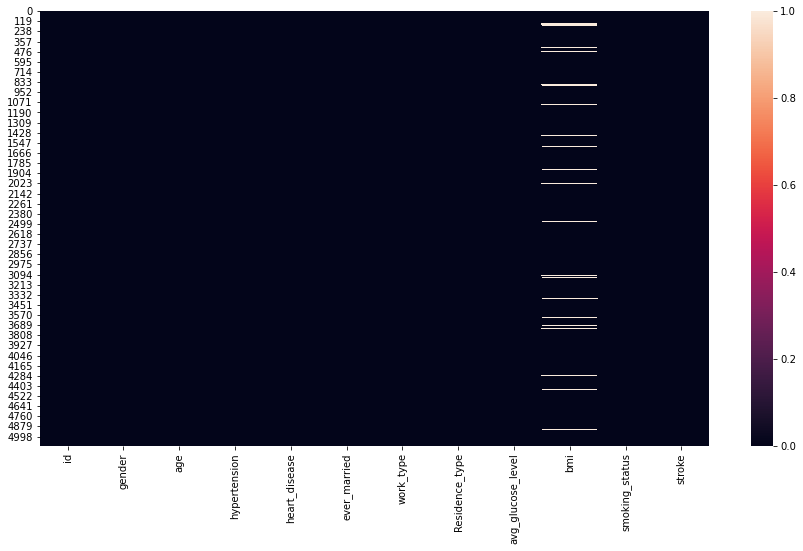

In [23]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull(),cbar=True)
plt.show()

In [24]:
#We can drop the records having null values

In [25]:
df1=df.dropna()

In [26]:
df1.isnull().sum()#checking

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [27]:
#checkig for outliers

Box plot for the column id :


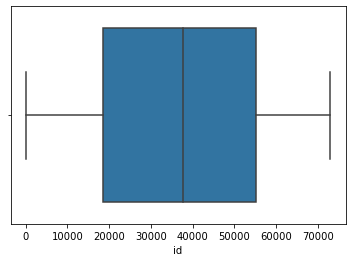

Box plot for the column age :


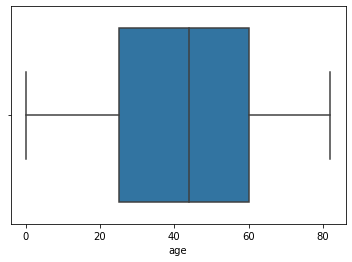

Box plot for the column hypertension :


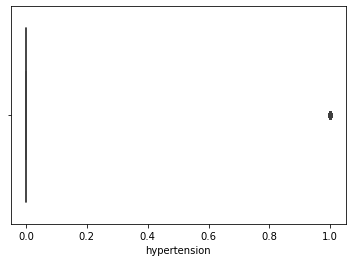

Box plot for the column heart_disease :


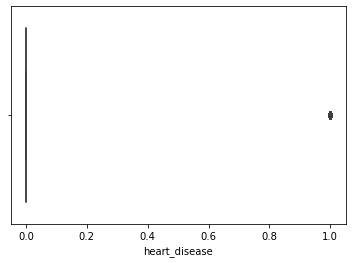

Box plot for the column avg_glucose_level :


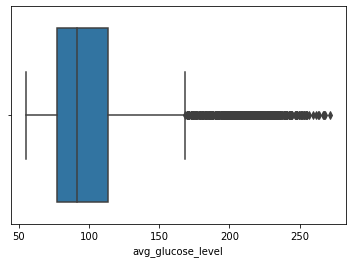

Box plot for the column bmi :


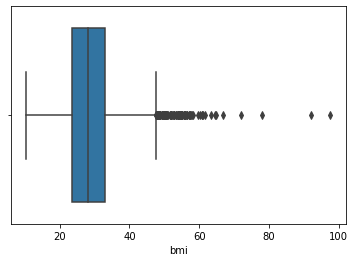

Box plot for the column stroke :


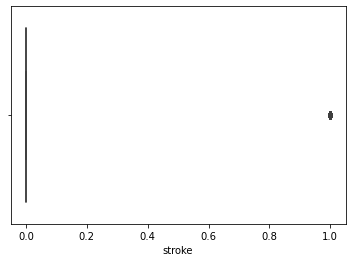

In [28]:
for i in df1.select_dtypes(include=np.number).columns:
    print('Box plot for the column',i,':')
    sns.boxplot(df1[i])
    plt.show()

In [29]:
#For the modelling purpose we will go ahead with the outliers

In [30]:
df1=df1.drop('id',axis=1)#dropping unwanted column

In [31]:
#Some visulization

In [32]:
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [33]:
df1['age'].value_counts()

78.00    93
57.00    93
52.00    85
54.00    84
51.00    83
         ..
1.40      3
0.16      3
0.48      2
0.08      2
0.40      2
Name: age, Length: 104, dtype: int64

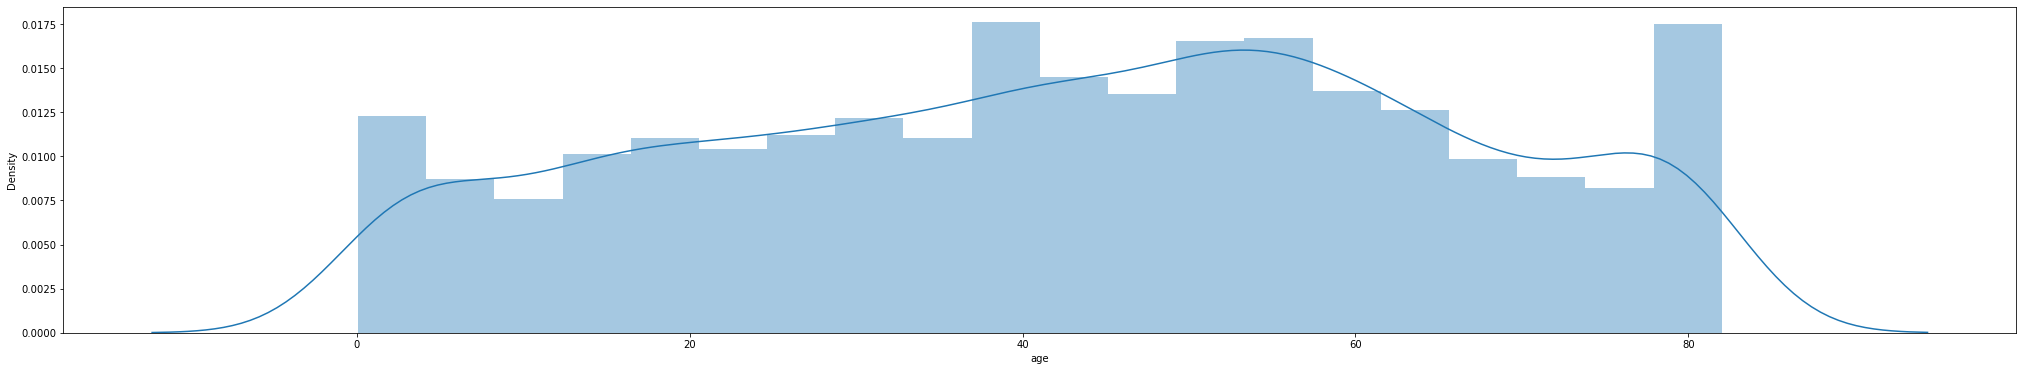

In [34]:
plt.figure(figsize=(35,6))
sns.distplot(df1['age'])
plt.show()

In [35]:
#Age is more dominat in the middle age rane (20 to 60)

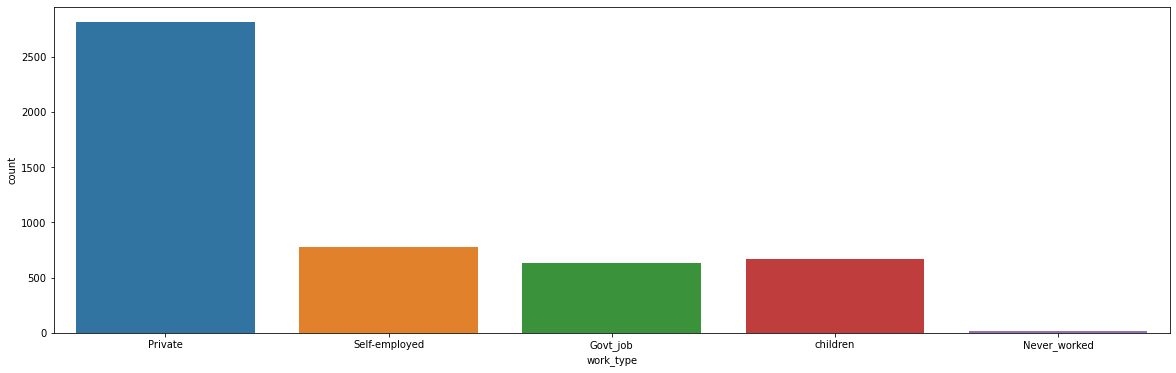

In [36]:
plt.figure(figsize=(20,6))
sns.countplot(df1['work_type'])
plt.show()

In [37]:
#Private jobs are higher with respect to the others

In [38]:
df1['Residence_type'].value_counts()

Urban    2490
Rural    2419
Name: Residence_type, dtype: int64

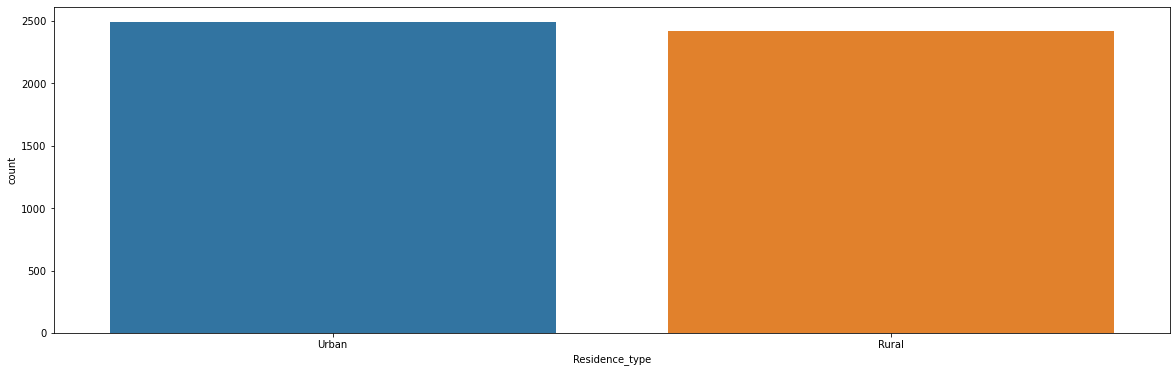

In [39]:
plt.figure(figsize=(20,6))
sns.countplot(df1['Residence_type'])
plt.show()

In [40]:
#almsot Uran and Rural are same

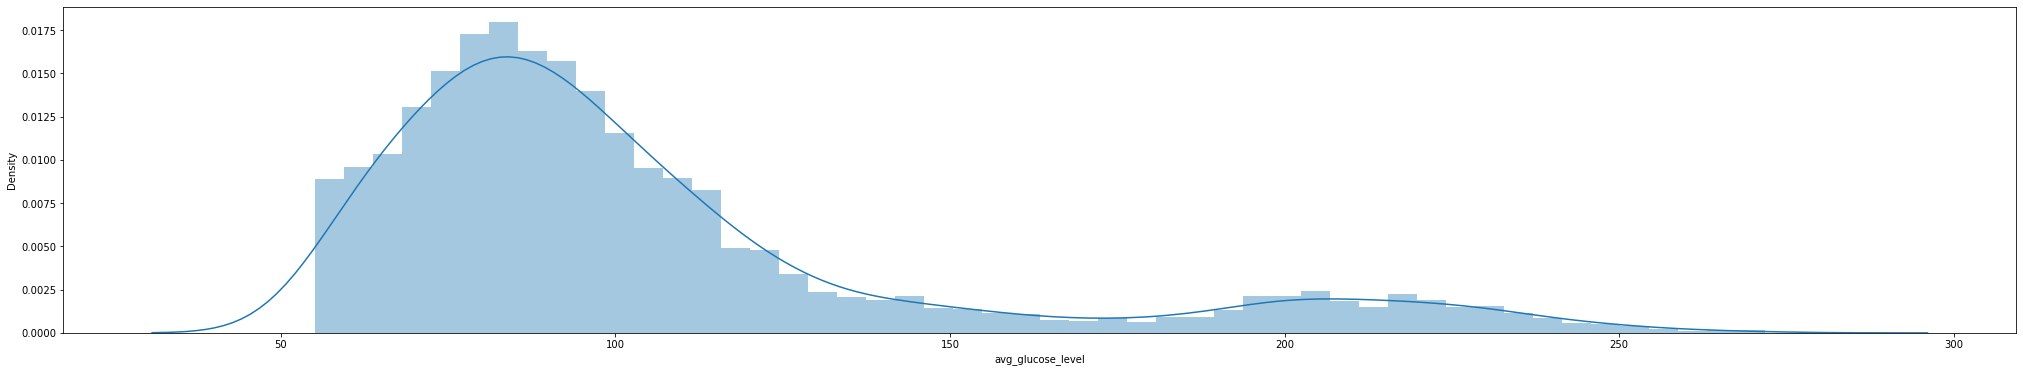

In [41]:
plt.figure(figsize=(35,6))
sns.distplot(df1['avg_glucose_level'])
plt.show()

In [42]:
#avg_glucose_level is more dominant in 50 to 100

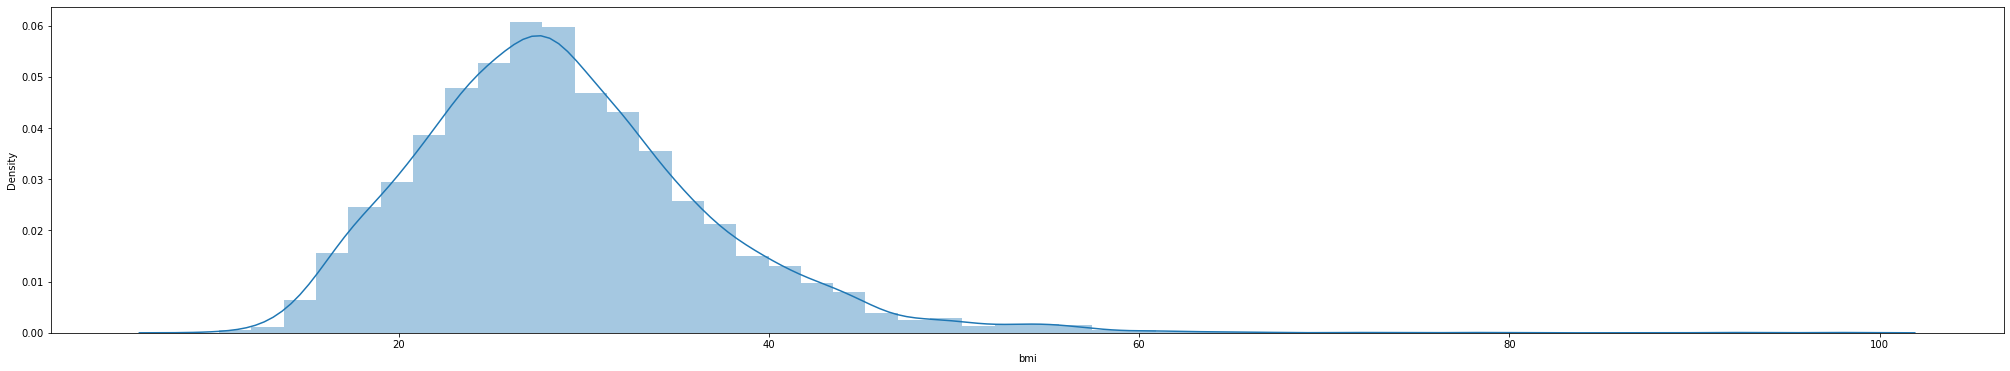

In [43]:
plt.figure(figsize=(35,6))
sns.distplot(df1['bmi'])
plt.show()

In [44]:
#bmi is more dominant in 20 to 40

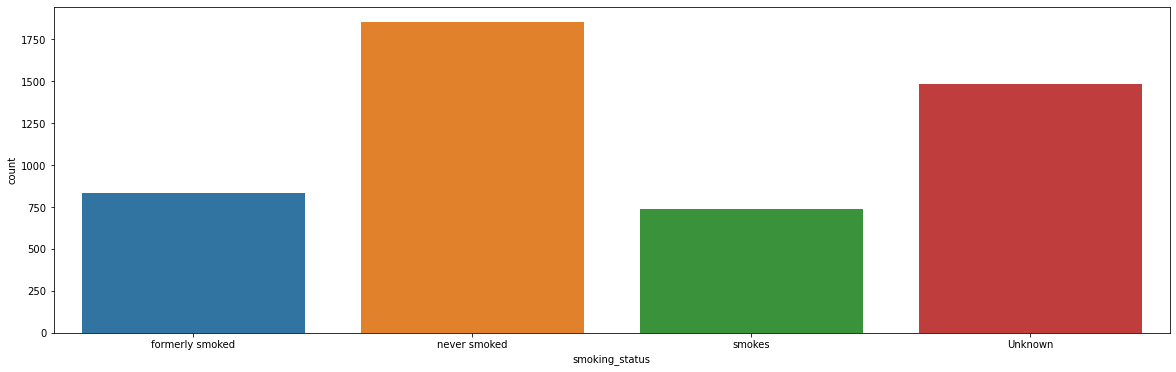

In [45]:
plt.figure(figsize=(20,6))
sns.countplot(df1['smoking_status'])
plt.show()

In [46]:
#never smoked status is more dominant

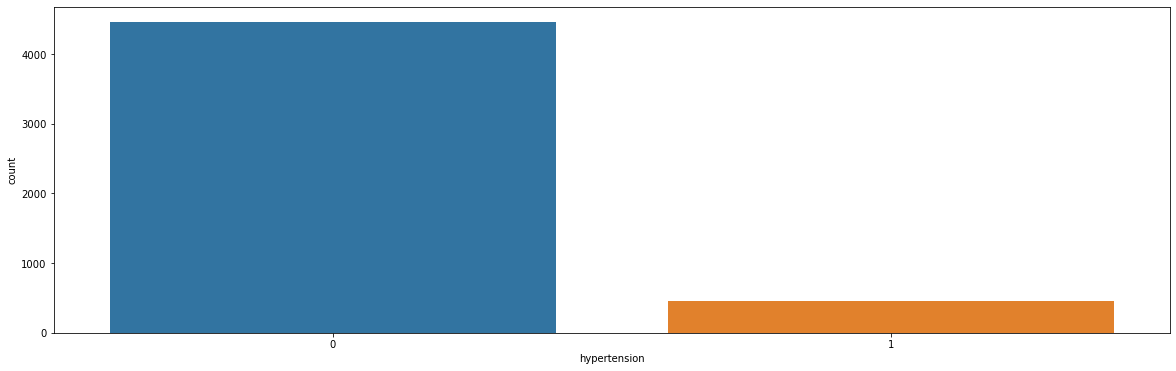

In [47]:
plt.figure(figsize=(20,6))
sns.countplot(df1['hypertension'])
plt.show()

In [48]:
#hypertension is less overall

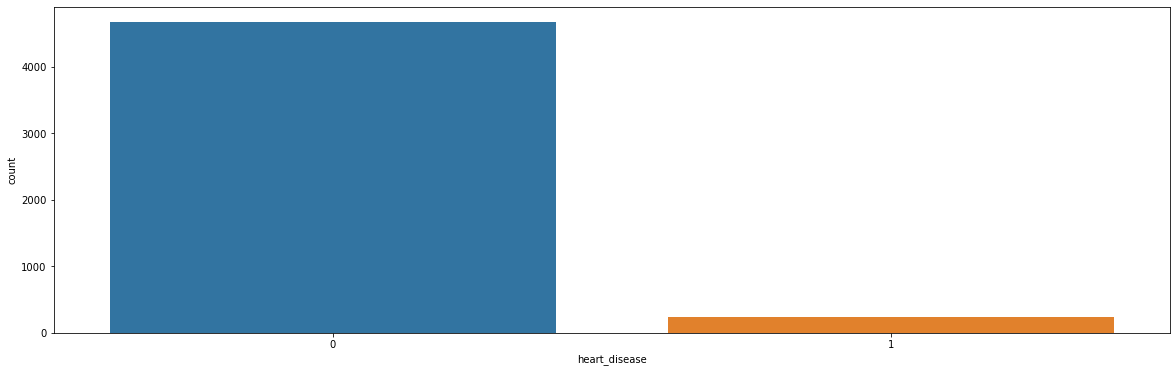

In [49]:
plt.figure(figsize=(20,6))
sns.countplot(df1['heart_disease'])
plt.show()

In [50]:
#number of patients having heart disesases is less

In [51]:
#covariacne plot

In [52]:
df1.cov()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,508.733210,1.788043,1.258092,236.308914,59.061247,1.058096
hypertension,1.788043,0.083449,0.007269,2.316917,0.380736,0.008313
heart_disease,1.258092,0.007269,0.047060,1.489179,0.070465,0.006042
avg_glucose_level,236.308914,2.316917,1.489179,1973.522043,61.234769,1.246260
bmi,59.061247,0.380736,0.070465,61.234769,61.686364,0.067199
stroke,1.058096,0.008313,0.006042,1.246260,0.067199,0.040771


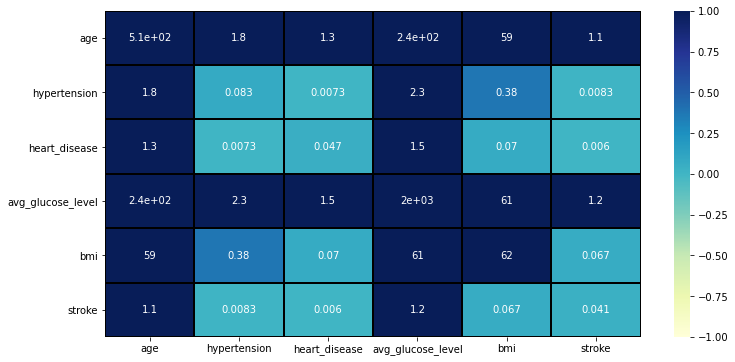

In [53]:
plt.figure(figsize=(12,6))
sns.heatmap(df1.cov(),vmax=1,vmin=-1,annot=True,linewidths=1,linecolor='black',cmap="YlGnBu")
plt.show()

In [54]:
#corealtion plot

In [55]:
df1.cov()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,508.733210,1.788043,1.258092,236.308914,59.061247,1.058096
hypertension,1.788043,0.083449,0.007269,2.316917,0.380736,0.008313
heart_disease,1.258092,0.007269,0.047060,1.489179,0.070465,0.006042
avg_glucose_level,236.308914,2.316917,1.489179,1973.522043,61.234769,1.246260
bmi,59.061247,0.380736,0.070465,61.234769,61.686364,0.067199
stroke,1.058096,0.008313,0.006042,1.246260,0.067199,0.040771


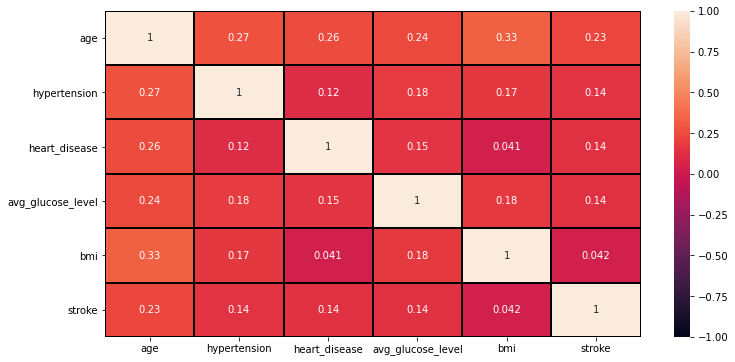

In [56]:
plt.figure(figsize=(12,6))
sns.heatmap(df1.corr(),vmax=1,vmin=-1,annot=True,linewidths=1,linecolor='black')
plt.show()

In [57]:
##inferences:

#Age and taget variable stroke has a good positve corelation 0.23
#hypertension , heart disease adn gluscose level and taget variable stroke has positve corelation 0.14

In [58]:
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


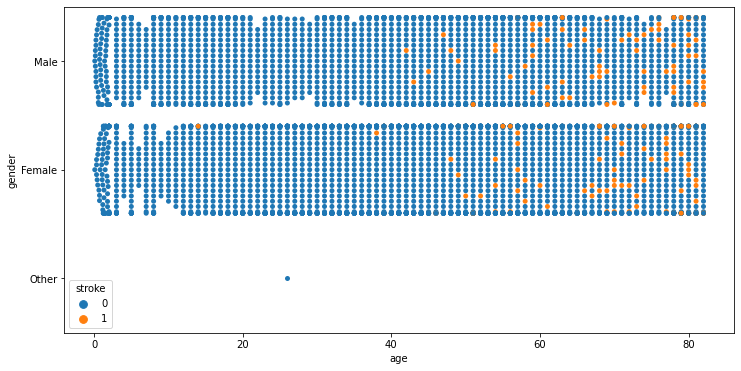

In [59]:
plt.figure(figsize=(12,6))
sns.swarmplot(x='age',y='gender',hue='stroke',data=df1)
plt.show()

In [60]:
#for both male and feamle after the age of 40 the chance of stroke increases

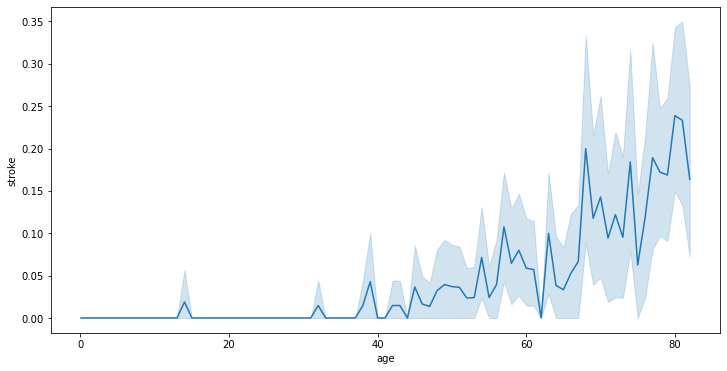

In [61]:
plt.figure(figsize=(12,6))
sns.lineplot(x='age',y='stroke',data=df1)
plt.show()

In [62]:
#As age increases the chances if stroke also increases

In [63]:
df2=df1.copy()#making copy of the original dataframe

In [64]:
df2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [65]:
Ind_vari=df2.drop('stroke',axis=1)
Ind_vari.head()#independent variables

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked


In [66]:
Y=df1['stroke']#dependent variables

In [67]:
#encoding

In [68]:
Label_encoder=LabelEncoder()

In [69]:
Ind_vari['gender']=Label_encoder.fit_transform(Ind_vari['gender'])
Ind_vari['ever_married']=Label_encoder.fit_transform(Ind_vari['ever_married'])
Ind_vari['work_type']=Label_encoder.fit_transform(Ind_vari['work_type'])
Ind_vari['Residence_type']=Label_encoder.fit_transform(Ind_vari['Residence_type'])
Ind_vari['smoking_status']=Label_encoder.fit_transform(Ind_vari['smoking_status'])

In [70]:
Ind_vari.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.6,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2
3,0,49.0,0,0,1,2,1,171.23,34.4,3
4,0,79.0,1,0,1,3,0,174.12,24.0,2
5,1,81.0,0,0,1,2,1,186.21,29.0,1


In [71]:
#Scaling

In [72]:
standard_scaler=StandardScaler()
Ind_vari_new=standard_scaler.fit_transform(Ind_vari)
X=pd.DataFrame(Ind_vari_new,columns=Ind_vari.columns)

In [73]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.198428,1.070138,-0.318067,4.381968,0.729484,-0.155697,0.985640,2.777698,0.981345,-0.351788
1,1.198428,1.646563,-0.318067,4.381968,0.729484,-0.155697,-1.014569,0.013842,0.459269,0.585232
2,-0.833023,0.272012,-0.318067,-0.228208,0.729484,-0.155697,0.985640,1.484132,0.701207,1.522252
3,-0.833023,1.602222,3.143994,-0.228208,0.729484,0.759651,-1.014569,1.549193,-0.623083,0.585232
4,1.198428,1.690903,-0.318067,-0.228208,0.729484,-0.155697,0.985640,1.821368,0.013595,-0.351788


In [74]:
Y.value_counts()

0    4700
1     209
Name: stroke, dtype: int64

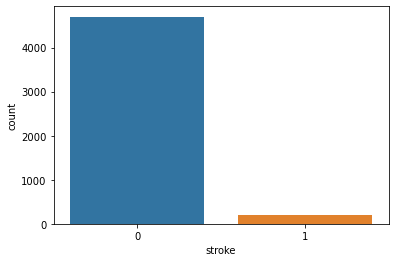

In [75]:
sns.countplot(Y)
plt.show()

In [76]:
#As data is imbalanced we will perform SMOTE Analysis

In [77]:
from imblearn.over_sampling import SMOTE

In [78]:
sm=SMOTE(random_state=2)
X1,Y1= sm.fit_resample(X,Y)
Y1.value_counts()

0    4700
1    4700
Name: stroke, dtype: int64

In [79]:
#Now Data is balaced

In [80]:
#Performing Train_test_split

In [81]:
x_train,x_test, y_train , y_test = train_test_split(X1, Y1, test_size=0.3, random_state=2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6580, 10)
(2820, 10)
(6580,)
(2820,)


In [82]:
#Build the base model and explain the reason of selecting that model.
#What is the overall accuracy?Also comment whether it is good or bad.

In [83]:
#1. KNeighborsClassifier

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
knc=KNeighborsClassifier()
KNeighbors_Classifier=knc.fit(x_train,y_train)

In [86]:
knc_pred=KNeighbors_Classifier.predict(x_test)

In [87]:
print(classification_report(knc_pred,y_test))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1206
           1       0.99      0.85      0.91      1614

    accuracy                           0.91      2820
   macro avg       0.91      0.92      0.91      2820
weighted avg       0.92      0.91      0.91      2820



In [88]:
confusion_matrix(knc_pred,y_test)

array([[1189,   17],
       [ 249, 1365]], dtype=int64)

In [89]:
accuracy_score(knc_pred,y_test)*100

90.56737588652483

In [90]:
##Inference:

#Accuracy of the model is 90

#Precison of the model is high amlost 0.91

#TPR(true positive rate) ie, Recall is also high 0.92

In [91]:
#ROC curve

In [92]:
fpr1,tpr1,threshold1=metrics.roc_curve(knc_pred,y_test)
roc_auc1=metrics.auc(fpr1,tpr1)

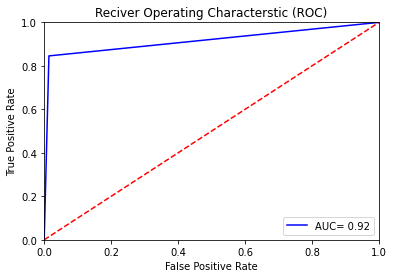

In [93]:
plt.title('Reciver Operating Characterstic (ROC)')
plt.plot(fpr1,tpr1,'b',label='AUC= %0.2f' %roc_auc1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [94]:
#Interpretation: 
#The red dotted line represents the ROC curve of a purely random classifier; 
#a good classifier stays as far away from that line as possible (toward the top-left corner).

#From the above plot, we can see that our classifier (KNeighborsClassifier) is away from the red dotted line; 
#with the AUC score 0.92.

In [95]:
#Check if the model is overfitting

In [96]:
knc_pred_train=KNeighbors_Classifier.predict(x_train)

In [97]:
print(classification_report(knc_pred_train,y_train))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93      2831
           1       1.00      0.88      0.94      3749

    accuracy                           0.93      6580
   macro avg       0.93      0.94      0.93      6580
weighted avg       0.94      0.93      0.93      6580



In [98]:
confusion_matrix(knc_pred_train,y_train)

array([[2820,   11],
       [ 442, 3307]], dtype=int64)

In [99]:
accuracy_score(knc_pred_train,y_train)*100

93.11550151975683

In [100]:
#There is little overfitting in the model 

In [101]:
#Tune the Hyperparameters using GridSearchCV (KNeighborsClassifier)

In [102]:
tuning_parameters_1={'n_neighbors' : range(2,9),
                    'metric': ['euclidean','manhattan']}

In [103]:
knc1=KNeighborsClassifier()

knc_grid=GridSearchCV(estimator=knc1,param_grid=tuning_parameters_1,cv=3,scoring='accuracy')

knc_grid.fit(x_train,y_train)

print('Best parameters for KNeighborsClassifier: ', knc_grid.best_params_, '\n')

Best parameters for KNeighborsClassifier:  {'metric': 'manhattan', 'n_neighbors': 2} 



In [104]:
knc2=KNeighborsClassifier(n_neighbors=2,metric='manhattan')
KNeighbors_Classifier2=knc2.fit(x_train,y_train)

In [110]:
knc_pred2=KNeighbors_Classifier2.predict(x_test)

In [111]:
print(classification_report(knc_pred2,y_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1412
           1       0.96      0.94      0.95      1408

    accuracy                           0.95      2820
   macro avg       0.95      0.95      0.95      2820
weighted avg       0.95      0.95      0.95      2820



In [112]:
confusion_matrix(knc_pred2,y_test)

array([[1350,   62],
       [  88, 1320]], dtype=int64)

In [113]:
accuracy_score(knc_pred2,y_test)*100

94.68085106382979

In [114]:
#After GridSearchCV on KNeighborsClassifier there was no changes in the number of n_neighbors

In [115]:
#2. Decision Tree Classifier

In [116]:
from sklearn.tree import DecisionTreeClassifier

In [117]:
dtc=DecisionTreeClassifier()
Decision_Tree_Classifier=dtc.fit(x_train,y_train)

In [118]:
dtc_pred=Decision_Tree_Classifier.predict(x_test)

In [119]:
print(classification_report(dtc_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1397
           1       0.93      0.90      0.91      1423

    accuracy                           0.91      2820
   macro avg       0.91      0.91      0.91      2820
weighted avg       0.91      0.91      0.91      2820



In [120]:
confusion_matrix(dtc_pred,y_test)

array([[1296,  101],
       [ 142, 1281]], dtype=int64)

In [121]:
accuracy_score(dtc_pred,y_test)

0.9138297872340425

In [122]:
##Inference:

#Accuracy of the model is 91

#Precison of the model is high amlost 0.91

#TPR(true positive rate) ie, Recall is also high 0.91

In [123]:
#ROC curve

In [132]:
fpr2,tpr2,threshold2=metrics.roc_curve(dtc_pred,y_test)
roc_auc2=metrics.auc(fpr2,tpr2)

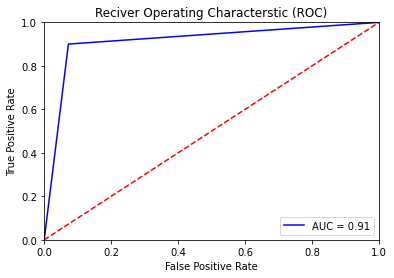

In [133]:
plt.title('Reciver Operating Characterstic (ROC)')
plt.plot(fpr2,tpr2,'b',label='AUC = %0.2f' %roc_auc2)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [134]:
#Interpretation: 
#The red dotted line represents the ROC curve of a purely random classifier; 
#a good classifier stays as far away from that line as possible (toward the top-left corner).

#From the above plot, we can see that our classifier (DecisionTreeClassifier) is away from the red dotted line; 
#with the AUC score 0.91.

In [135]:
#To check if the model is overfitted or not

In [136]:
dtc_pred_tain=Decision_Tree_Classifier.predict(x_train)

In [137]:
print(classification_report(dtc_pred_tain,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3262
           1       1.00      1.00      1.00      3318

    accuracy                           1.00      6580
   macro avg       1.00      1.00      1.00      6580
weighted avg       1.00      1.00      1.00      6580



In [138]:
confusion_matrix(dtc_pred_tain,y_train)

array([[3262,    0],
       [   0, 3318]], dtype=int64)

In [139]:
accuracy_score(dtc_pred_tain,y_train)

1.0

In [140]:
#There is overfitting in the model on train accuracy

In [141]:
#Tune the Hyperparameters using GridSearchCV (DecisionTreeClassifier)

In [142]:
tuning_parameters_2={'criterion':['gini', 'entropy'],
                     'max_depth': range(2,7),
                    'min_samples_split': range(2,7)}

In [143]:
dtc1=DecisionTreeClassifier()

dtc_grid=GridSearchCV(estimator=dtc1,param_grid=tuning_parameters_2,cv=3,scoring='accuracy')
dtc_grid.fit(x_train,y_train)
print('Best parameters for DecisionTreeClassifier: ', dtc_grid.best_params_ , '\n')

Best parameters for DecisionTreeClassifier:  {'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 2} 



In [149]:
dtc2=DecisionTreeClassifier(criterion='entropy',max_depth=6,min_samples_split=2)
Decision_Tree_Classifier2=dtc2.fit(x_train,y_train)

In [150]:
dtc_pred2=Decision_Tree_Classifier2.predict(x_test)

In [151]:
print(classification_report(dtc_pred2,y_test))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1427
           1       0.82      0.81      0.81      1393

    accuracy                           0.82      2820
   macro avg       0.82      0.82      0.82      2820
weighted avg       0.82      0.82      0.82      2820



In [152]:
confusion_matrix(dtc_pred2,y_test)

array([[1175,  252],
       [ 263, 1130]], dtype=int64)

In [153]:
accuracy_score(dtc_pred2,y_test)*100

81.73758865248227

In [154]:
#checking if the overfitting has reduced

In [155]:
dtc_pred2_train=Decision_Tree_Classifier2.predict(x_train)

In [156]:
print(classification_report(dtc_pred2_train,y_train))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      3241
           1       0.84      0.84      0.84      3339

    accuracy                           0.84      6580
   macro avg       0.84      0.84      0.84      6580
weighted avg       0.84      0.84      0.84      6580



In [157]:
confusion_matrix(dtc_pred2_train,y_train)

array([[2719,  522],
       [ 543, 2796]], dtype=int64)

In [158]:
accuracy_score(dtc_pred2_train,y_train)*100

83.8145896656535

In [159]:
#After GridSearchCV on DecisionTreeClassifier with the tunned parameters the Overfitting has reduced 

In [160]:
#Important features

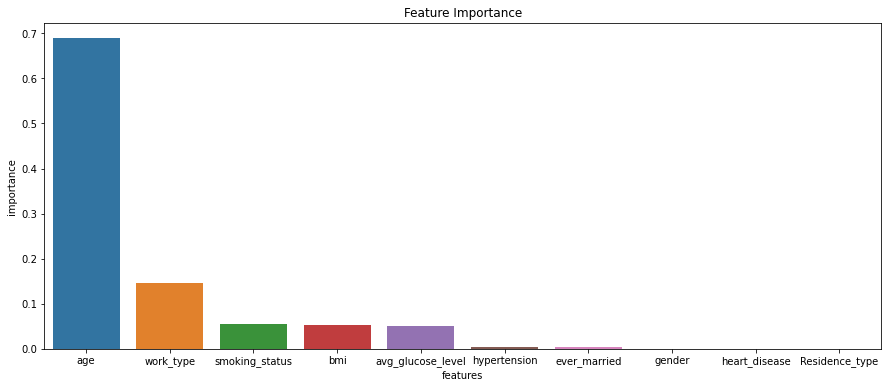

In [161]:
features_importance1=pd.DataFrame({'features':x_train.columns,
                                 'importance':Decision_Tree_Classifier2.feature_importances_})
features_importance1 = features_importance1.sort_values('importance', ascending = False)
plt.figure(figsize=(15,6))
sns.barplot(x='features',y='importance',data=features_importance1)
plt.title('Feature Importance')
plt.show()

In [162]:
#3.Random Forest Classifier

In [164]:
from sklearn.ensemble  import RandomForestClassifier

In [165]:
rfc=RandomForestClassifier()
Random_Forest_Classifier=rfc.fit(x_train,y_train)

In [166]:
rfc_pred=Random_Forest_Classifier.predict(x_test)

In [167]:
print(classification_report(rfc_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1416
           1       0.97      0.96      0.96      1404

    accuracy                           0.97      2820
   macro avg       0.97      0.97      0.97      2820
weighted avg       0.97      0.97      0.97      2820



In [168]:
confusion_matrix(rfc_pred,y_test)

array([[1378,   38],
       [  60, 1344]], dtype=int64)

In [169]:
accuracy_score(rfc_pred,y_test)*100

96.52482269503547

In [170]:
##Inference:

#Accuracy of the model is 96.52

#Precison of the model is high amlost 0.97

#TPR(true positive rate) ie, Recall is also high 0.97

In [171]:
#ROC curve

In [172]:
fpr3,tpr3,threshold3=metrics.roc_curve(rfc_pred,y_test)
roc_auc3=metrics.auc(fpr3,tpr3)

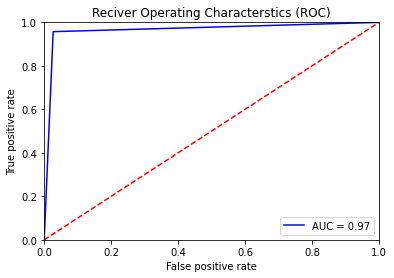

In [173]:
plt.title('Reciver Operating Characterstics (ROC)')
plt.plot(fpr3,tpr3,'b',label='AUC = %0.2f' %roc_auc3)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [174]:
#Interpretation: 
#The red dotted line represents the ROC curve of a purely random classifier; 
#a good classifier stays as far away from that line as possible (toward the top-left corner).

#From the above plot, we can see that our classifier (RandomForestClassifier) is away from the red dotted line; 
#with the AUC score 0.95.

In [175]:
#to check if the model is overfitted 

In [176]:
rfc_pred_train=Random_Forest_Classifier.predict(x_train)

In [177]:
print(classification_report(rfc_pred_train,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3262
           1       1.00      1.00      1.00      3318

    accuracy                           1.00      6580
   macro avg       1.00      1.00      1.00      6580
weighted avg       1.00      1.00      1.00      6580



In [178]:
confusion_matrix(rfc_pred_train,y_train)

array([[3262,    0],
       [   0, 3318]], dtype=int64)

In [179]:
accuracy_score(rfc_pred_train,y_train)

1.0

In [180]:
#There is overfitting in the model on train accuracy

In [181]:
#Tune the Hyperparameters using GridSearchCV (RandomForestClassifier)

In [182]:
tunning_parameter_3={'n_estimators':[50,60,70,80,90,100],
                     'criterion':['gini','entropy'],
                     'max_depth': range(2,6)}

In [183]:
rfc1=RandomForestClassifier()
rfc_grid=GridSearchCV(estimator=rfc1,param_grid=tunning_parameter_3,cv=3,scoring='accuracy')
rfc_grid.fit(x_train,y_train)
print('Best parameters for RandomForestClassifier: ', rfc_grid.best_params_ , '\n')

Best parameters for RandomForestClassifier:  {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 90} 



In [184]:
rfc2=RandomForestClassifier(n_estimators=90,criterion='entropy',max_depth=5)
Random_Forest_Classifier2=rfc2.fit(x_train,y_train)

In [185]:
rfc_pred2=Random_Forest_Classifier2.predict(x_test)

In [186]:
print(classification_report(rfc_pred2,y_test))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81      1235
           1       0.89      0.78      0.83      1585

    accuracy                           0.82      2820
   macro avg       0.82      0.83      0.82      2820
weighted avg       0.83      0.82      0.82      2820



In [187]:
confusion_matrix(rfc_pred2,y_test)

array([[1082,  153],
       [ 356, 1229]], dtype=int64)

In [188]:
accuracy_score(rfc_pred2,y_test)

0.8195035460992908

In [189]:
#checking if the overfitting has reduced

In [190]:
rfc_pred2_train=Random_Forest_Classifier2.predict(x_train)

In [191]:
print(classification_report(rfc_pred2_train,y_train))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81      2800
           1       0.90      0.79      0.84      3780

    accuracy                           0.83      6580
   macro avg       0.82      0.83      0.82      6580
weighted avg       0.84      0.83      0.83      6580



In [192]:
confusion_matrix(rfc_pred2_train,y_train)

array([[2456,  344],
       [ 806, 2974]], dtype=int64)

In [193]:
accuracy_score(rfc_pred2_train,y_train)

0.8252279635258358

In [194]:
#After GridSearchCV on RandomForestClassifier with the tunned parameters the Overfitting has reduced 

In [195]:
#Feature Importance

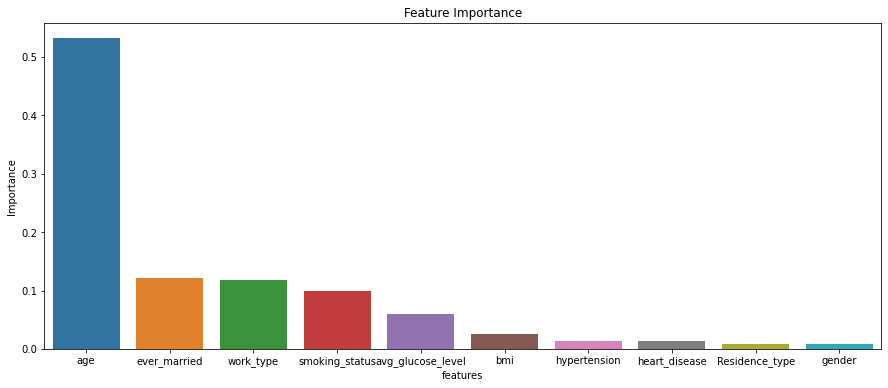

In [196]:
features_importance_2=pd.DataFrame({'features': x_train.columns,
                                   'Importance':Random_Forest_Classifier2.feature_importances_ })

features_importance_2=features_importance_2.sort_values(by='Importance',ascending=False)

plt.figure(figsize=(15,6))
sns.barplot(x='features',y='Importance',data=features_importance_2)
plt.title('Feature Importance')
plt.show()

In [197]:
#4. Adaboost Classifier

In [198]:
from sklearn.ensemble import AdaBoostClassifier

In [199]:
ada=AdaBoostClassifier(n_estimators=40,random_state=2)
AdaBoost_classifier=ada.fit(x_train,y_train)

In [200]:
ada_pred=AdaBoost_classifier.predict(x_test)

In [201]:
print(classification_report(ada_pred,y_test))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1321
           1       0.90      0.83      0.87      1499

    accuracy                           0.86      2820
   macro avg       0.86      0.86      0.86      2820
weighted avg       0.87      0.86      0.86      2820



In [202]:
confusion_matrix(ada_pred,y_test)

array([[1186,  135],
       [ 252, 1247]], dtype=int64)

In [203]:
accuracy_score(ada_pred,y_test)*100

86.27659574468085

In [204]:
##Inference:

#Accuracy of the model is 86.27

#Precison of the model is high amlost 0.86

#TPR(true positive rate) ie, Recall is also high 0.86

In [205]:
fpr4,tpr4,threshold4=metrics.roc_curve(ada_pred,y_test)
roc_auc4=metrics.auc(fpr4,tpr4)

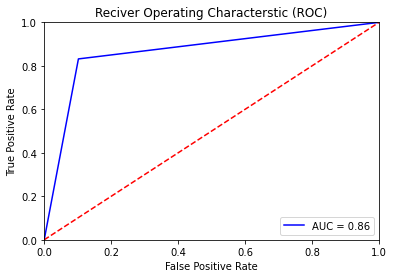

In [206]:
plt.title('Reciver Operating Characterstic (ROC)')
plt.plot(fpr4,tpr4,'b',label='AUC = %0.2f' %roc_auc4)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [207]:
#Interpretation: 
#The red dotted line represents the ROC curve of a purely random classifier; 
#a good classifier stays as far away from that line as possible (toward the top-left corner).

#From the above plot, we can see that our classifier (RandomForestClassifier) is away from the red dotted line; 
#with the AUC score 0.90.

In [208]:
#To check if the model is overfitted or not

In [209]:
ada_pred_train=AdaBoost_classifier.predict(x_train)

In [210]:
print(classification_report(ada_pred_train,y_train))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      3043
           1       0.90      0.85      0.87      3537

    accuracy                           0.87      6580
   macro avg       0.87      0.87      0.87      6580
weighted avg       0.87      0.87      0.87      6580



In [211]:
confusion_matrix(ada_pred_train,y_train)

array([[2719,  324],
       [ 543, 2994]], dtype=int64)

In [212]:
accuracy_score(ada_pred_train,y_train)*100

86.82370820668693

In [213]:
#There is no overfiting

In [214]:
#Tune the Hyperparameters using GridSearchCV (AdaBoostClassifier)

In [215]:
tuning_parameters_4={'n_estimators':range(30,70)}

In [216]:
ada1=AdaBoostClassifier()
ada_grid=GridSearchCV(estimator=ada1,param_grid=tuning_parameters_4,cv=3,scoring='accuracy')
ada_grid.fit(x_train,y_train)
print('Best parameters for AdaBoostClassifier: ', ada_grid.best_params_ , '\n')

Best parameters for AdaBoostClassifier:  {'n_estimators': 67} 



In [218]:
ada2=AdaBoostClassifier(n_estimators=67,random_state=2)
AdaBoost_classifier2=ada2.fit(x_train,y_train)

In [219]:
ada_pred2=AdaBoost_classifier2.predict(x_test)

In [220]:
print(classification_report(ada_pred2,y_test))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1363
           1       0.91      0.86      0.89      1457

    accuracy                           0.88      2820
   macro avg       0.89      0.89      0.88      2820
weighted avg       0.89      0.88      0.88      2820



In [221]:
confusion_matrix(ada_pred2,y_test)

array([[1238,  125],
       [ 200, 1257]], dtype=int64)

In [222]:
accuracy_score(ada_pred2,y_test)*100

88.47517730496453

In [223]:
#checking if the overfitting has reduced

In [224]:
ada_pred2_train=AdaBoost_classifier2.predict(x_train)

In [225]:
print(classification_report(ada_pred2_train,y_train))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      3096
           1       0.91      0.87      0.89      3484

    accuracy                           0.89      6580
   macro avg       0.89      0.89      0.89      6580
weighted avg       0.89      0.89      0.89      6580



In [226]:
confusion_matrix(ada_pred2_train,y_train)

array([[2804,  292],
       [ 458, 3026]], dtype=int64)

In [227]:
accuracy_score(ada_pred2_train,y_train)*100

88.60182370820668

In [228]:
#after Grid Search overftiing has reduced

In [229]:
#5. Gradient Boosting

In [230]:
from sklearn.ensemble import GradientBoostingClassifier

In [231]:
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)
GradientBoosting=gboost_model.fit(x_train, y_train)

In [232]:
gb_preds = GradientBoosting.predict(x_test)

In [233]:
print(classification_report(gb_preds,y_test))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1454
           1       0.96      0.97      0.96      1366

    accuracy                           0.97      2820
   macro avg       0.97      0.97      0.97      2820
weighted avg       0.97      0.97      0.97      2820



In [234]:
confusion_matrix(gb_preds,y_test)

array([[1397,   57],
       [  41, 1325]], dtype=int64)

In [235]:
accuracy_score(gb_preds,y_test)*100

96.52482269503547

In [236]:
##Inference:

#Accuracy of the model is 96

#Precison of the model is high amlost 0.97

#TPR(true positive rate) ie, Recall is also high 0.97

In [237]:
#ROC curve

In [238]:
fpr5,tpr5,threshold5=metrics.roc_curve(gb_preds,y_test)
roc_auc5=metrics.auc(fpr5,tpr5)

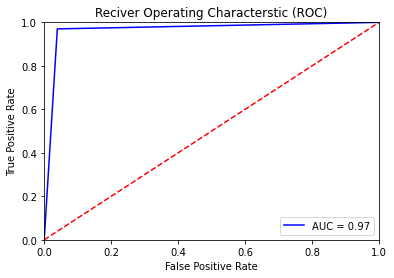

In [239]:
plt.title('Reciver Operating Characterstic (ROC)')
plt.plot(fpr5,tpr5,'b',label='AUC = %0.2f' %roc_auc5)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [240]:
#Interpretation: 
#The red dotted line represents the ROC curve of a purely random classifier; 
#a good classifier stays as far away from that line as possible (toward the top-left corner).

#From the above plot, we can see that our classifier (RandomForestClassifier) is away from the red dotted line; 
#with the AUC score 0.95.

In [241]:
#To check if the model is overfitted or not

In [242]:
gb_preds_train=GradientBoosting.predict(x_train)

In [243]:
print(classification_report(gb_preds_train,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3262
           1       1.00      1.00      1.00      3318

    accuracy                           1.00      6580
   macro avg       1.00      1.00      1.00      6580
weighted avg       1.00      1.00      1.00      6580



In [244]:
confusion_matrix(gb_preds_train,y_train)

array([[3262,    0],
       [   0, 3318]], dtype=int64)

In [245]:
accuracy_score(gb_preds_train,y_train)*100

100.0

In [246]:
#Model is overfiting on train accuracy

In [247]:
#Tune the Hyperparameters using GridSearchCV (GradientBoostingClassifier)

In [248]:
tuning_parameters_5={'n_estimators':[140,150,160],
                    'max_depth':range(5,10)}

In [249]:
gboost_model1 = GradientBoostingClassifier()
gboost_grid=GridSearchCV(estimator=gboost_model1,param_grid=tuning_parameters_5,cv=3,scoring='accuracy')
gboost_grid.fit(x_train,y_train)
print('Best parameters for GradientBoostingClassifier: ', gboost_grid.best_params_ , '\n')

Best parameters for GradientBoostingClassifier:  {'max_depth': 8, 'n_estimators': 160} 



In [250]:
gboost_model2 = GradientBoostingClassifier(n_estimators = 160, max_depth = 8)
GradientBoosting2=gboost_model2.fit(x_train, y_train)

In [251]:
gb_preds2=GradientBoosting2.predict(x_test)

In [252]:
print(classification_report(gb_preds2,y_test))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1460
           1       0.96      0.97      0.97      1360

    accuracy                           0.97      2820
   macro avg       0.97      0.97      0.97      2820
weighted avg       0.97      0.97      0.97      2820



In [253]:
confusion_matrix(gb_preds2,y_test)

array([[1403,   57],
       [  35, 1325]], dtype=int64)

In [254]:
accuracy_score(gb_preds2,y_test)*100

96.73758865248226

In [255]:
#checking if the overfitting has reduced

In [256]:
gb_preds2_train=GradientBoosting2.predict(x_train)

In [257]:
print(classification_report(gb_preds2_train,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3262
           1       1.00      1.00      1.00      3318

    accuracy                           1.00      6580
   macro avg       1.00      1.00      1.00      6580
weighted avg       1.00      1.00      1.00      6580



In [258]:
confusion_matrix(gb_preds2_train,y_train)

array([[3262,    0],
       [   0, 3318]], dtype=int64)

In [259]:
accuracy_score(gb_preds2_train,y_train)*100

100.0

In [260]:
#6.Stack Generalization

In [248]:
#Build the stacking classifier using the Random forest, KNN and Naive bayes as base learners 
#(consider the hyperparameters tuned using GridSearchCV in the previous sessions).

In [261]:
from sklearn.ensemble import StackingClassifier
# consider the various algorithms as base learners
base_learners = [('AdaBoost_model', AdaBoostClassifier(n_estimators=67,random_state=2)),
                 ('RandomForest_model', RandomForestClassifier(n_estimators=90,criterion='entropy',max_depth=5)),
                 ('GradientBoosting_model', GradientBoostingClassifier(n_estimators = 160, max_depth = 8, random_state = 10))]

# initialize stacking classifier 
# pass the base learners to the parameter, 'estimators'
# pass the Naive Bayes model as the 'final_estimator'/ meta model
stack_model = StackingClassifier(estimators = base_learners, final_estimator = GradientBoostingClassifier())

# fit the model on train dataset
StackingClass=stack_model.fit(x_train, y_train)

In [262]:
Sc_preds= StackingClass.predict(x_test)

In [263]:
print(classification_report(Sc_preds, y_test))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1470
           1       0.95      0.98      0.96      1350

    accuracy                           0.97      2820
   macro avg       0.97      0.97      0.97      2820
weighted avg       0.97      0.97      0.97      2820



In [264]:
confusion_matrix(Sc_preds, y_test)

array([[1405,   65],
       [  33, 1317]], dtype=int64)

In [265]:
accuracy_score(Sc_preds, y_test)*100

96.52482269503547

In [ ]:
#------------------------------------END---------------------------------------------------------------------#